#### **Task 3(a): Take grayscale image of size 512x512, apply average & median spatial filters with 5x5 mask & observe their performance for noise suppression in term of PSNR**

##### Importing the Libraries

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Function for Average Spatial Filter

In [2]:
def average_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset, weight = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            filtered_image[r,c] = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >=0 and r + x < height and c + y >= 0 and c + y < width):
                        filtered_image[r,c] +=(image[r + x, c + y] / weight)
    return np.uint8(filtered_image)


##### Function for Median Spatial Filter

In [3]:
def median_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixels = []
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset):
                    if( r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixels.append(image[r + x, c + y])
            filtered_image[r,c] = sorted(pixels)[len(pixels) // 2]

    return np.uint8(filtered_image)



##### Function for adding Salt & Pepper Noise

In [4]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = int(image.shape[0] * image.shape[1] * (percent / 100))

    for _ in range(noise_amount):
        row1 = np.random.randint(0, image.shape[0])
        col1 = np.random.randint(0, image.shape[1])
        row2 = np.random.randint(0, image.shape[0])
        col2 = np.random.randint(0, image.shape[1])

        noisy_image[row1, col1] = 0      # pepper
        noisy_image[row2, col2] = 255    # salt

    return noisy_image


##### Function for calculating PSNR (Peak Signal to Noise Ratio)

In [5]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

##### Loading the Image

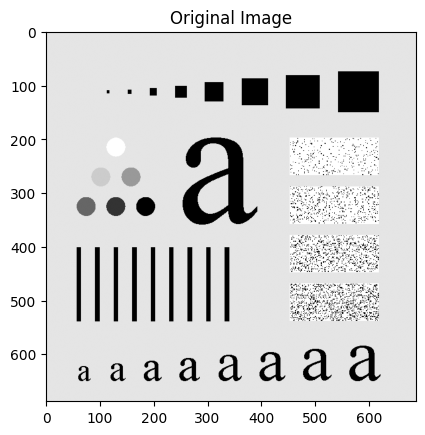

In [10]:
character_image = cv2.imread("./Characters Test Pattern 688x688.tif", 0)
plt.imshow(character_image, cmap = "gray")
plt.title("Original Image")
plt.show()

##### Adding Salt & Pepper Noise to the Image

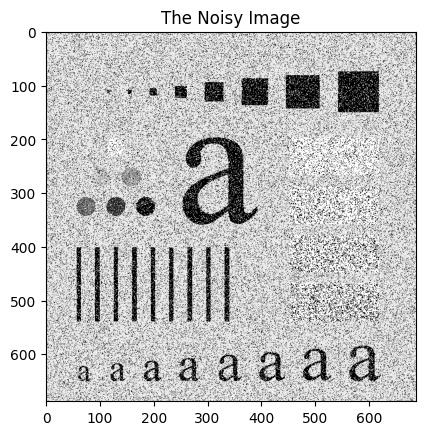

PSNR = 9.59


In [11]:
noisy_character_image = add_salt_pepper_noise(character_image, 15)
plt.imshow(noisy_character_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()
psnr = compute_psnr(character_image, noisy_character_image)
print(f"PSNR = {psnr}")

##### Applying Average Spatial Filter

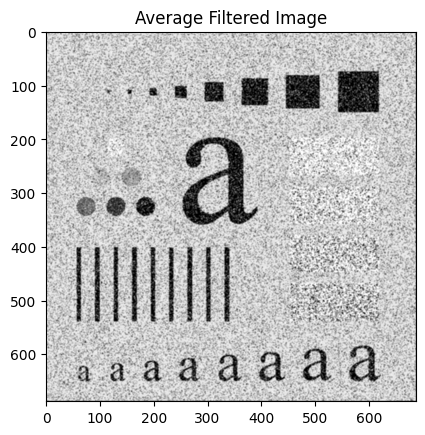

PSNR = 14.52


In [12]:
mask_size = 3
avg_character_image = average_filter(noisy_character_image, mask_size)
plt.imshow(avg_character_image, cmap = "gray")
plt.title("Average Filtered Image")
plt.show()
psnr = compute_psnr(avg_character_image, character_image)
print(f"PSNR = {psnr}")

##### Applying Median Spatial Filter

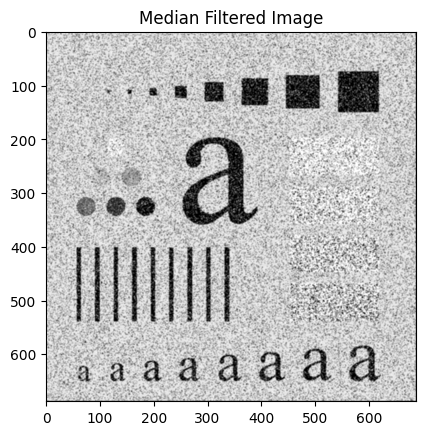

PSNR = 16.56


In [13]:
mask_size = 3
median_character_image = median_filter(noisy_character_image, mask_size)
plt.imshow(avg_character_image, cmap = "gray")
plt.title("Median Filtered Image")
plt.show()
psnr = compute_psnr(median_character_image, character_image)
print(f"PSNR = {psnr}")

#### **Task 3(b): Take grayscale image of size 512x512, use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression & observe their performance in term of PSNR**

##### Applying average filter with (3x3, 5x5, 7x7) mask

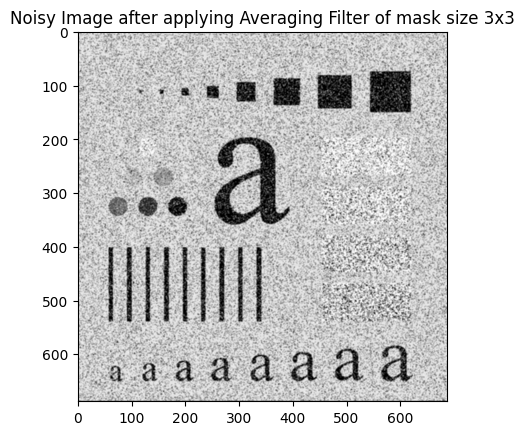

PSNR = 10.31


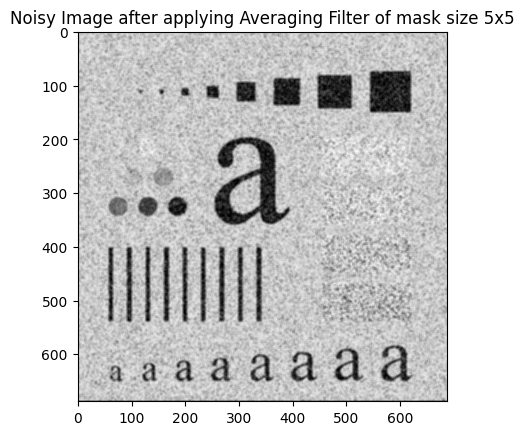

PSNR = 9.87


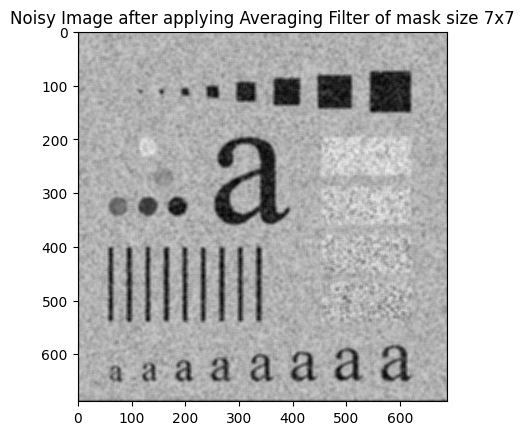

PSNR = 9.37


In [14]:
for mask_size in range(3, 8, 2):
    avg_character_image = average_filter(noisy_character_image, mask_size)
    plt.imshow(cv2.cvtColor(avg_character_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Noisy Image after applying Averaging Filter of mask size {mask_size}x{mask_size}")
    plt.show()
    print(f"PSNR = {compute_psnr(noisy_character_image, avg_character_image)}")

#### **Task 3(c): Take a grayscale image of size 512x512, apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR**

##### Function for Harmonic Mean Filter
The Harmonic Mean Filter works well for salt noise, but fails for pepper noise

In [15]:
def apply_harmonic_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape 
    offset, number_of_pixel = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += float(1 / (image[r + x, c + y] + 1e-4))
            pixel = number_of_pixel / pixel
            filtered_image[r, c] = 255 if pixel > 255 else pixel

    return np.uint8(filtered_image)

##### Function for Geometric Mean Filter

In [16]:
def apply_geometric_mean_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixel = 1
            count = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        if (image[r + x, c + y]):
                            count += 1
                            pixel = pixel * int(image[r + x, c + y])
            count = 1 if count == 0 else count
            filtered_image[r, c] = pixel ** (1 / count)

    return np.uint8(filtered_image)

##### Applying Harmonic Mean Filter

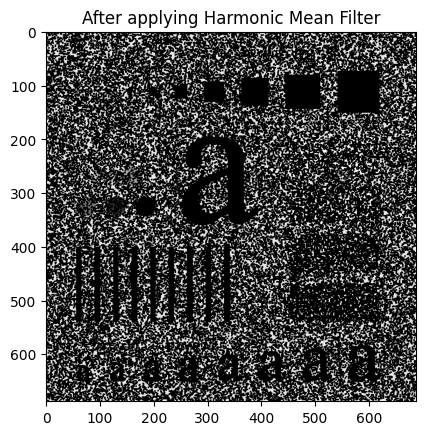

PSNR = 3.27


In [17]:
mask_size = 3
harmonic_filtered_image = apply_harmonic_mean_filter(noisy_character_image, mask_size)
plt.imshow(cv2.cvtColor(harmonic_filtered_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Harmonic Mean Filter")
plt.show()
print(f"PSNR = {compute_psnr(noisy_character_image, harmonic_filtered_image)}")

##### Applying Geometric Mean Filter

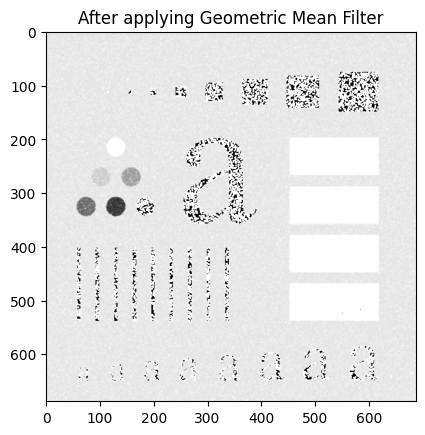

PSNR = 7.85


In [18]:
geometric_filtered_image = apply_geometric_mean_filter(noisy_character_image, mask_size)
plt.imshow(cv2.cvtColor(geometric_filtered_image, cv2.COLOR_BGR2RGB))
plt.title("After applying Geometric Mean Filter")
plt.show()
print(f"PSNR = {compute_psnr(noisy_character_image, geometric_filtered_image)}")